In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rayon = 0.05
v_max = 1 / 20
Re = 500
rho_0 = 1.
mu = 1.e-3   # bulk viscosity
eta = rho_0 * v_max * 2 * rayon / Re  # shear viscosity  (same as just a viscosity)

In [ ]:
nu = U_MAX * L / RE

### Re and viscosity

$Re = uL / \nu = \rho uL / \mu$
- $\eta$ - eta
- $\nu$ - nu - kinematic viscosity
    - $\nu = \frac{\mu}{\rho}$
    - $\nu = u L / Re$
    - default for water $10^{-6}\  m^2/s$
- $\mu$ - mu - dinamic viscosity
    - $\mu = \nu \rho$
    - $\mu = \rho u  L / Re$
    - default for water $10^{-3}\  Pa/s$
    
### Poiseuille flow

$u(y) = \frac{G}{2\mu}y(h - y)$

For the pipe from [this source](https://www.simscale.com/docs/validation-cases/hagen-poiseuille-flow/): $u(r) = u_{max} (1 - r^2  /R^2)$

From the source code: $u(y) = 4 u_{max} (yW - y ^ 2)/ W ^2 = \frac{4 u_{max}}{W ^2} y(W - y^2)$

### Relaxation term

$\tau = 3\nu + 1/2$

$F_{t+1} = F_t - \frac{1}{\tau}(F_t - F_{eq})$

$\omega = \frac{1}{(3 \nu + 1/2)} = \frac{1}{\tau} \in [0..2]$

$F_{t+1} = (1 - \omega)F_t + \omega F_{eq} = F_t - \omega(F_t - F_{eq})$

- Large Re - small viscosity - larger turbulence - smaller $\tau$, larger $\omega$
- Lower viscosities require lower flow velocities


In [50]:
# Constants definition
NORM_CYLINDER_RADIUS = 0.125
NORM_CYLINDER_DIAMETER = NORM_CYLINDER_RADIUS * 2
U_MAX = 0.1
rho_0 = 1
RE = 100

# Constants to the formula representation
L = NORM_CYLINDER_DIAMETER
u = U_MAX
rho = rho_0
Re = RE

# Kinematic viscosity
nu = u * L / Re
print(f"nu: {nu}")

# Get dynamic viscosity
mu = rho * u * L / Re
print(f"mu: {mu}")

# Get relaxation parameters
tau = 3 * nu + 1/2
print(f"tau: {tau}")

omega = 1 / (3 * nu + 0.5)
print(f"omega: {omega}")

nu: 0.00025
mu: 0.00025
tau: 0.50075
omega: 1.9970044932601096


In [ ]:
# Updates:
# - Velocity profile should be constant with predefined Umax
# - We should change only relaxation term depends on Re number

tau = 1 / (3 * nu + 1/2)
tau = 3 * nu + 1/2
print(f"tau: {tau}")

# nu     = uMax * 2.*obst_r / Re;  % kinematic viscosity
# tau  = 1. / (3*nu+1./2.);

# from the octave / snd outer source:
omega = 1 / (3 * viscosity + 0.5)

In [24]:
# according to the definitions in the python library
rhoo = 1
rayon = 0.05
Re = 500
v0 = 0.05
mu = 1.e-3   # bulk viscosity
eta = rhoo*v0*2*rayon/Re  # shear viscosity
print(f"eta: {eta}")

eta: 1.0000000000000003e-05


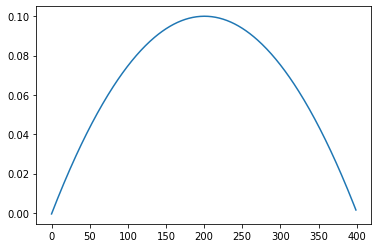

In [20]:
# poiseuille profile
# similar to https://www.simscale.com/docs/validation-cases/hagen-poiseuille-flow/
LENGTH_Y = 400
y_phys = np.arange(LENGTH_Y) - .5
ux = 4 * U_MAX / (LENGTH_Y ** 2) * (y_phys * LENGTH_Y - y_phys * y_phys)
pylab.plot(ux)